# What Is Normalization?

Normalization is a data preprocessing technique used to adjust the values of features in a dataset to a common scale. This is done to facilitate data analysis and modeling, and to reduce the impact of different scales on the accuracy of machine learning models.

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

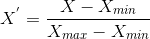

Normalization equation
Here, **Xmax** and **Xmin** are the maximum and the minimum values of the feature, respectively.

In [5]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
df=pd.DataFrame(iris.data)
df['class']=iris.target
df['class'] = df['class'].replace([0,1,2],['setosa', 'versicolor', 'virginica'])
df.rename(columns = {0:'sepal_length',
  1:'sepal_width',
  2:'petal_length',
  3:'petal_width',},inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Example 1

In [20]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

X_train = df.iloc[:,0:4].copy()
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

In [22]:
df_trans = pd.DataFrame(X_train_norm,columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])   
df_trans.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


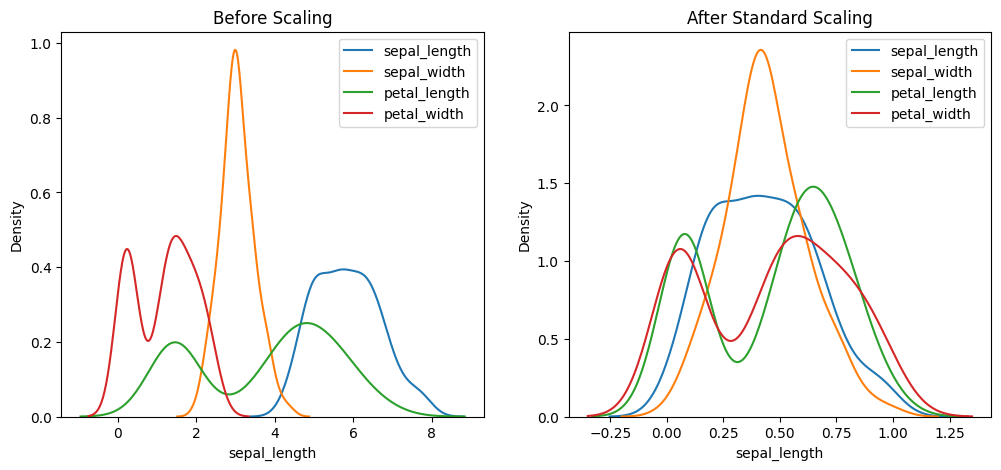

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(df['sepal_length'], ax=ax1)
sns.kdeplot(df['sepal_width'], ax=ax1)
sns.kdeplot(df['petal_length'], ax=ax1)
sns.kdeplot(df['petal_width'], ax=ax1)
ax1.legend(labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(df_trans['sepal_length'], ax=ax2)
sns.kdeplot(df_trans['sepal_width'], ax=ax2)
sns.kdeplot(df_trans['petal_length'], ax=ax2)
sns.kdeplot(df_trans['petal_width'], ax=ax2)
ax2.legend(labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

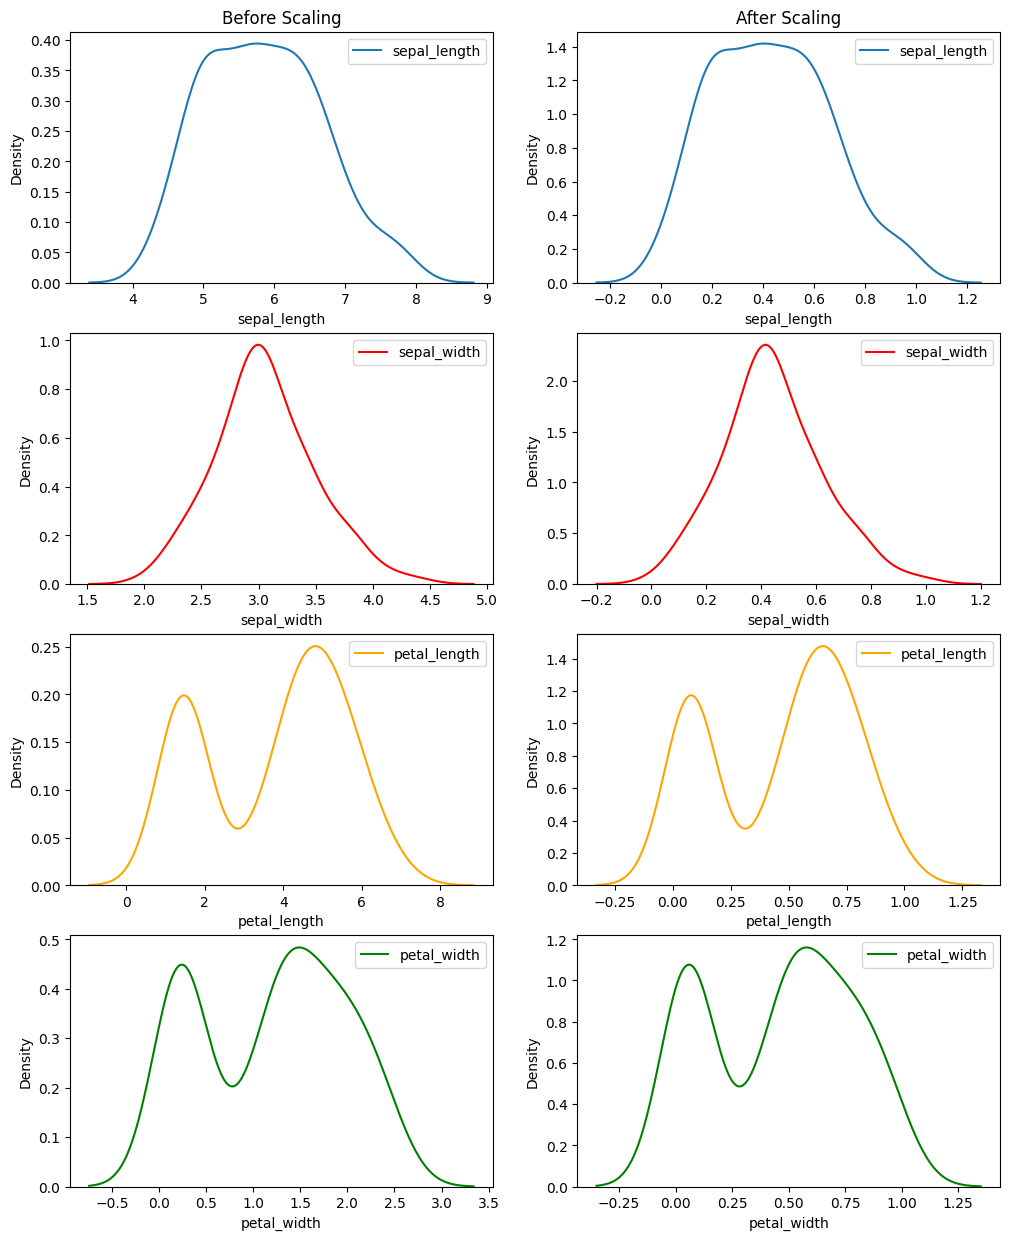

In [55]:
fig, ax = plt.subplots(nrows = 4, ncols=2, figsize=(12, 15))
ax[0][0].set_title('Before Scaling')
sns.kdeplot(df['sepal_length'], ax=ax[0][0])
ax[0][0].legend(labels = ['sepal_length'])

ax[0][1].set_title('After Scaling')
sns.kdeplot(df_trans['sepal_length'], ax=ax[0][1])
ax[0][1].legend(labels = ['sepal_length'])



sns.kdeplot(df['sepal_width'], ax=ax[1][0],color='red')
ax[1][0].legend(labels = ['sepal_width'])
sns.kdeplot(df_trans['sepal_width'], ax=ax[1][1],color='red')
ax[1][1].legend(labels = ['sepal_width'])

sns.kdeplot(df['petal_length'], ax=ax[2][0],color='orange')
ax[2][0].legend(labels = ['petal_length'])
sns.kdeplot(df_trans['petal_length'], ax=ax[2][1],color='orange')
ax[2][1].legend(labels = ['petal_length'])

sns.kdeplot(df['petal_width'], ax=ax[3][0],color='green')
ax[3][0].legend(labels = ['petal_width'])
sns.kdeplot(df_trans['petal_width'], ax=ax[3][1],color='green')
ax[3][1].legend(labels = ['petal_width'])
plt.show()